# Stochastic Assignment 3.63 - 3.65
# Date: 1-9-2023

# 3.63 : Hourly wind speeds in a northwestern region of Turkey are modeled by a Markov chain in Sahin and Sen (2001). Seven wind speed levels are the states EXERCISES 157 of the chain. The transition matrix

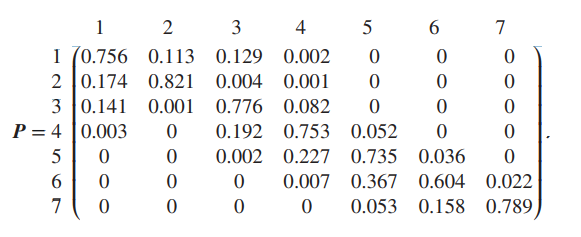

(a) Find the limiting distribution by (i) taking high matrix powers, and (ii) using the stationary command in the utilities.R ile. How often does the highest wind speed occur? How often does the lowest speed occur?<br>
(b) Simulate the chain for 100,000 steps and estimate the proportion of times that the chain visits each state.


# Download the markovchain package from Github

In [2]:
devtools::install_github('spedygiorgio/markovchain')

Rcpp         (NA -> 1.0.11    ) [CRAN]
RcppArmad... (NA -> 0.12.6.3.0) [CRAN]
RcppParallel (NA -> 5.1.7     ) [CRAN]
expm         (NA -> 0.999-7   ) [CRAN]
igraph       (NA -> 1.5.1     ) [CRAN]


Installing 5 packages: Rcpp, RcppArmadillo, RcppParallel, expm, igraph

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpwaBVo6/remotes3c8678d9a8f/spedygiorgio-markovchain-a7a36fd/DESCRIPTION’ ... OK
* preparing ‘markovchain’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘markovchain_0.9.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(markovchain)

Package:  markovchain
Version:  0.9.4
Date:     
BugReport: https://github.com/spedygiorgio/markovchain/issues




# a 1 . Limiting Distribution by taking higher powers

In [25]:
# a)

# Define the transition matrix as a vector
P_vector <- c(
  0.756, 0.113, 0.129, 0.002, 0, 0, 0,    # Transition probabilities for state 1
  0.174, 0.821, 0.004, 0.001, 0, 0, 0,    # Transition probabilities for state 2
  0.141, 0.001, 0.776, 0.082, 0, 0, 0,    # Transition probabilities for state 3
  0.003, 0, 0.192, 0.753, 0.052, 0, 0,    # Transition probabilities for state 4
  0.002, 0.227, 0.735, 0.036, 0, 0, 0,    # Transition probabilities for state 5
  0.007, 0.367, 0.604, 0.022, 0, 0, 0,    # Transition probabilities for state 6
  0.053, 0.158, 0.789, 0, 0, 0, 0          # Transition probabilities for state 7
)

# Convert the transition vector to a transition matrix
P_matrix <- matrix(P_vector, nrow = 7, byrow = TRUE)

# Create a Markov chain object with character state names
states <- as.character(1:7)
mc <- new("markovchain", states = states, transitionMatrix = P_matrix, name = "WindSpeed")

# Calculate the limiting distribution by taking high matrix powers
limiting_dist_power <- mc ^ 100000  # Compute the distribution after a large number of steps
limiting_dist_power_final <- limiting_dist_power[1, ]  # Extract the limiting distribution for state 1

# Output the limiting distribution
print("Limiting Distribution by Matrix Powers:")
print(limiting_dist_power_final)

[1] "Limiting Distribution by Matrix Powers:"
          1           2           3           4           5           6 
0.344561223 0.226454827 0.314409492 0.108911082 0.005663376 0.000000000 
          7 
0.000000000 


In [26]:
# Extract the probabilities of being in states 3 (highest wind speed) and 6 (lowest wind speed)
highest_speed_prob <- limiting_dist_power_final[3]  # Probability of being in state 3
lowest_speed_prob <- limiting_dist_power_final[6]   # Probability of being in state 6

# Output the probabilities
print(paste("Probability of Highest Wind Speed:", highest_speed_prob))
print(paste("Probability of Lowest Wind Speed:", lowest_speed_prob))


[1] "Probability of Highest Wind Speed: 0.314409492236285"
[1] "Probability of Lowest Wind Speed: 0"


# a 2 . Limiting Distribution by using the stationary command

In [27]:
# Calculate the limiting distribution using the stationary command
limiting_dist_stationary <- steadyStates(mc)  # Compute the stationary distribution

# Extract the probabilities of being in states 3 (highest wind speed) and 6 (lowest wind speed)
highest_speed_prob <- limiting_dist_stationary[3]  # Probability of being in state 3
lowest_speed_prob <- limiting_dist_stationary[6]   # Probability of being in state 6

# Output the probabilities and the stationary distribution
print("Limiting Distribution using Stationary Command:")
print(limiting_dist_stationary)



[1] "Limiting Distribution using Stationary Command:"
             1         2         3         4           5 6 7
[1,] 0.3445612 0.2264548 0.3144095 0.1089111 0.005663376 0 0


In [28]:
print(paste("Probability of Highest Wind Speed:", highest_speed_prob))
print(paste("Probability of Lowest Wind Speed:", lowest_speed_prob))

[1] "Probability of Highest Wind Speed: 0.314409492236834"
[1] "Probability of Lowest Wind Speed: 0"


# (b) Simulate the chain for 100,000 steps and estimate the proportion of times that the chain visits each state.

In [29]:
# Simulate the chain for 100,000 steps
set.seed(123)  # Set a seed for reproducibility
simulated_chain <- rmarkovchain(n = 100000, object = mc)  # Simulate the Markov chain

# Estimate the proportion of times that the chain visits each state
state_counts <- table(simulated_chain)  # Count the occurrences of each state
state_proportions <- state_counts / sum(state_counts)  # Calculate the proportions

# Output the estimated state proportions
print("Estimated State Proportions:")
print(state_proportions)


[1] "Estimated State Proportions:"
simulated_chain
      1       2       3       4       5 
0.34555 0.23164 0.30965 0.10756 0.00560 


In [31]:
# Calculate and print the probability of low wind speed (state 6)
low_wind_speed_prob <- state_proportions["5"]
print(paste("Probability of Low Wind Speed:", low_wind_speed_prob))

# Calculate and print the probability of high wind speed (state 3)
high_wind_speed_prob <- state_proportions["3"]
print(paste("Probability of High Wind Speed:", high_wind_speed_prob))

[1] "Probability of Low Wind Speed: 0.0056"
[1] "Probability of High Wind Speed: 0.30965"


# 3.64 : The evolution of forest ecosystems in the United States and Canada is studied in Strigul et al. (2012) using Markov chains. Five-year changes in the state of the forest soil are modeled with a 12-state Markov chain. The transition matrix can be found in the R script ile forest.R. About how many years does it take for the ecosystem to move from state 1 to state 12?

The Matrix for the forest ecosystems in US is given as

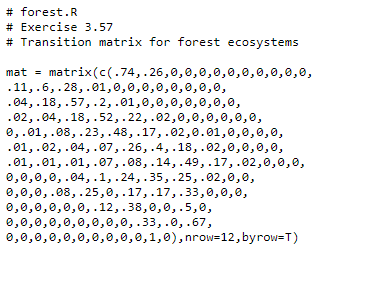

In [34]:
# Define the transition matrix for a 12-state Markov chain
mat <- matrix(c(
  .74, .26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # Transition probabilities for state 1
  .11, .6, .28, .01, 0, 0, 0, 0, 0, 0, 0, 0,  # Transition probabilities for state 2
  .04, .18, .57, .2, .01, 0, 0, 0, 0, 0, 0, 0,  # Transition probabilities for state 3
  .02, .04, .18, .52, .22, .02, 0, 0, 0, 0, 0, 0,  # Transition probabilities for state 4
  0, .01, .08, .23, .48, .17, .02, .01, 0, 0, 0, 0,  # Transition probabilities for state 5
  .01, .02, .04, .07, .26, .4, .18, .02, 0, 0, 0, 0,  # Transition probabilities for state 6
  .01, .01, .01, .07, .08, .14, .49, .17, .02, 0, 0, 0,  # Transition probabilities for state 7
  0, 0, 0, 0, .04, .10, .24, .35, .25, .02, 0, 0,  # Transition probabilities for state 8
  0, 0, 0, .08, .25, 0, .17, .17, .33, 0, 0, 0,  # Transition probabilities for state 9
  0, 0, 0, 0, 0, 0, .12, .38, 0, 0, .50, 0,  # Transition probabilities for state 10
  0, 0, 0, 0, 0, 0, 0, 0, 0, .33, .0, .67,  # Transition probabilities for state 11
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0  # Transition probabilities for state 12
), nrow = 12, byrow = TRUE)

# Define state names for the Markov chain
states <- as.character(1:12)

# Create a Markov chain object with transition matrix and state names
mc <- new("markovchain", states = states, transitionMatrix = mat, name = "ForestEcosystem")

# Simulate the chain until it reaches state 12 and record the number of years
num_simulations <- 10  # Number of simulations
years_to_state_12 <- numeric(num_simulations)

# Simulate each run, starting from state 1
for (i in 1:num_simulations) {
  current_state <- "1"  # Start from state "1" (as character)
  years <- 0  # Initialize years counter
  # Continue simulating until state 12 is reached
  while (current_state != "12") {
    current_state <- rmarkovchain(n = 1, object = mc, t0 = current_state)  # Simulate one step
    years <- years + 1  # Increment years counter
  }
  years_to_state_12[i] <- years  # Record the number of years for this run
}

# Calculate the average number of years to reach state 12 across simulations
average_years_to_state_12 <- mean(years_to_state_12)

# Output the result
cat("Average Number of Years to Reach State 12:", average_years_to_state_12, "\n")


Average Number of Years to Reach State 12: 15374.1 


#3.65 Simulate the gambler’s ruin problem for a gambler who starts with 15 dollars and quits when he reaches $50 or goes bust. Use your code to simulate the probability of eventual ruin and compare to the exact probability.

In [35]:
# Define parameters
initial_money <- 15      # The initial amount of money the gambler starts with
target_money <- 50       # The goal is to reach this amount or go bust
win_prob <- 0.5          # Probability of winning each bet
num_simulations <- 1000  # Number of simulations

# Function to simulate the gambler's ruin problem
simulate_ruin <- function(initial_money, target_money, win_prob) {
  money <- initial_money  # Initialize the gambler's money
  while (money > 0 && money < target_money) {
    # Simulate a bet with a random outcome
    if (runif(1) < win_prob) {
      money <- money + 1  # Win a bet, increase money
    } else {
      money <- money - 1  # Lose a bet, decrease money
    }
  }
  return(money == 0)  # Return TRUE if the gambler went bust, FALSE otherwise
}

# Simulate the problem and calculate the simulated probability of eventual ruin
ruin_count <- sum(replicate(num_simulations, simulate_ruin(initial_money, target_money, win_prob)))
simulated_probability_ruin <- ruin_count / num_simulations

# Calculate the exact probability of ruin using a formula
exact_probability_ruin <- (1 - (win_prob^(initial_money))) / (1 - (win_prob^(target_money - initial_money)))

# Output the results
cat("Simulated Probability of Eventual Ruin:", simulated_probability_ruin, "\n")
cat("Exact Probability of Eventual Ruin:", exact_probability_ruin, "\n")



Simulated Probability of Eventual Ruin: 0.669 
Exact Probability of Eventual Ruin: 0.9999695 
